## Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

## Step 2: Reading and understanding data

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Handling Null Values

In [4]:
df.drop(columns=["Id"], inplace=True)

In [5]:
df["MSSubClass"] = df["MSSubClass"].apply(lambda x: str(x))

In [6]:
df["LotFrontage"].fillna(value=df.LotFrontage.median(), inplace=True)

In [7]:
df["Alley"].fillna(value="NA", inplace=True)

In [8]:
df["MasVnrType"].fillna(value=df["MasVnrType"].mode()[0], inplace=True)

In [9]:
df["MasVnrArea"].fillna(value=df["MasVnrArea"].median(), inplace=True)

In [10]:
df["BsmtQual"].fillna(value="NA", inplace=True)
df["BsmtCond"].fillna(value="NA", inplace=True)
df["BsmtExposure"].fillna(value="NA", inplace=True)
df["BsmtFinType1"].fillna(value="NA", inplace=True)
df["BsmtFinType2"].fillna(value="NA", inplace=True)

In [11]:
df["FireplaceQu"].fillna(value="NA", inplace=True)

In [12]:
df["Electrical"].fillna(value=df["Electrical"].mode()[0], inplace=True)

In [13]:
df["GarageType"].fillna(value="NA", inplace=True)
df["GarageFinish"].fillna(value="NA", inplace=True)
df["GarageQual"].fillna(value="NA", inplace=True)
df["GarageCond"].fillna(value="NA", inplace=True)

In [14]:
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(value=0.0).apply(lambda x: "NA" if(x == 0.0) else str(int(x)))

In [15]:
df["PoolQC"].fillna(value="NA", inplace=True)
df["Fence"].fillna(value="NA", inplace=True)
df["MiscFeature"].fillna(value="NA", inplace=True)

In [16]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Converting Numerical catagorical Variable to string.

In [17]:
def convertMonth(Num):
    monthList = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
    if(Num > 0 & Num < 12):
        return(monthList[Num-1])
    else:
        return None

In [18]:
df["MoSold"] = df["MoSold"].apply(lambda x: convertMonth(x))

In [19]:
df["YrSold"] = df["YrSold"].apply(lambda x: str(x))

In [20]:
df["YearBuilt"] = df["YearBuilt"].apply(lambda x: str(x))
df["YearRemodAdd"] = df["YearRemodAdd"].apply(lambda x: str(x))

In [21]:
df["OverallQual"] = df["OverallQual"].apply(lambda x: str(x))
df["OverallCond"] = df["OverallCond"].apply(lambda x: str(x))

In [22]:
dic = {
    "10" : "VE",
    "9" : "EX",
    "8" : "VG",
    "7" : "GO",
    "6" : "AA",
    "5" : "AVG",
    "4" : "BA",
    "3" : "FA",
    "2" : "PO",
    "1" : "VP"
}
df["OverallQual"] = df["OverallQual"].apply(lambda x: dic[x])
df["OverallCond"] = df["OverallCond"].apply(lambda x: dic[x])

In [23]:
df[["MoSold","YrSold","YearBuilt","YearRemodAdd","OverallQual","OverallCond"]].head()

,MoSold,YrSold,YearBuilt,YearRemodAdd,OverallQual,OverallCond
0,Feb,2008,2003,2003,GO,AVG
1,May,2007,1976,1976,AA,VG
2,Sep,2008,2001,2002,GO,AVG
3,Feb,2006,1915,1970,GO,AVG
4,Dec,2008,2000,2000,VG,AVG


### Separating categorical, continuous and ranking column names in there respective variables.

In [24]:
rankingVar = ["OverallQual", "OverallCond","ExterQual","ExterCond","BsmtQual","BsmtCond","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond","PoolQC","Fence"]

In [25]:
continiousVar = list(df.select_dtypes(["int64","float64"]).columns)

In [26]:
categoricalVar = list(df.select_dtypes("object").columns)

### Checking the Skeuness of a responce variable i.e., "SalePrice"

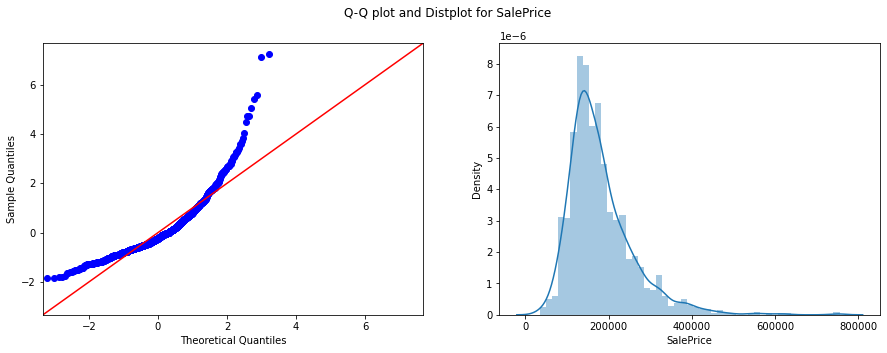

In [27]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Q-Q plot and Distplot for SalePrice")
sm.qqplot(data=df["SalePrice"], fit=True, line="45", ax=ax[0])
sns.distplot(df["SalePrice"], ax=ax[1])
plt.show()

#### we can clearly see in Q-Q plot SalePrice is incresing in exonential way and its not normaly distributed.

### Lets try log on SalePrice

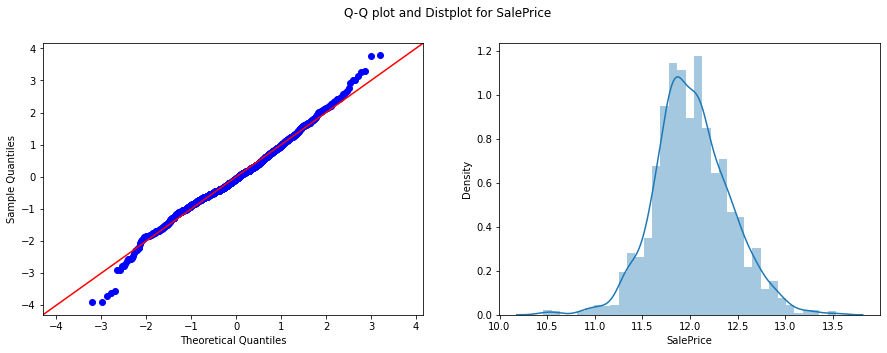

In [28]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
fig.suptitle("Q-Q plot and Distplot for SalePrice")
sm.qqplot(data=np.log(df["SalePrice"]), fit=True, line="45", ax=ax[0])
sns.distplot(np.log(df["SalePrice"]), ax=ax[1])
plt.show()

### Data transformation on SalePrice by applying Log

In [29]:
df["SalePrice"] = np.log(df["SalePrice"])

### Data visualising.

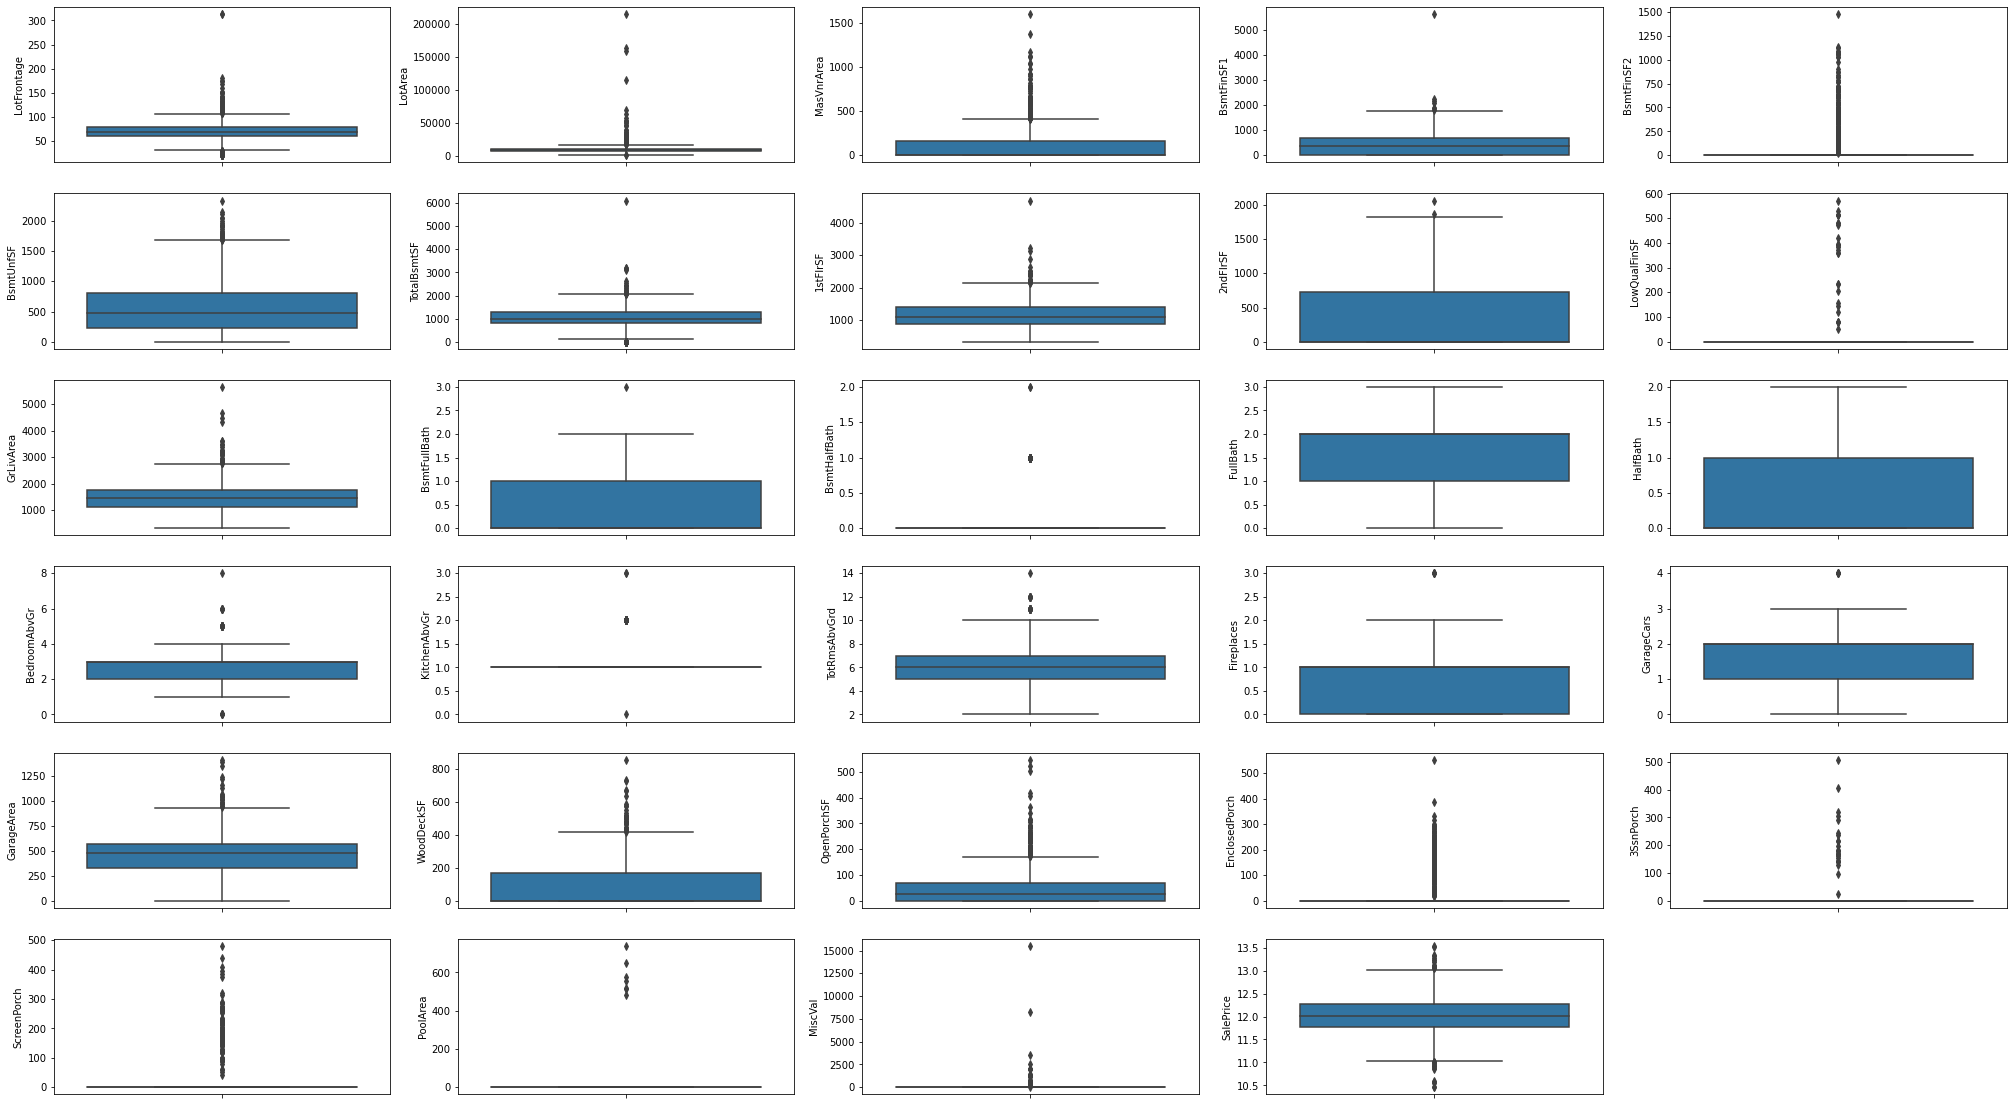

In [30]:
# visualising all continious variables to understand the range and how are they spread acroos the range.

plt.figure(figsize=(35, 20))
for i in range(len(continiousVar)):
    plt.subplot(6,5,i+1)
    sns.boxplot(y=continiousVar[i],data=df)
plt.show()

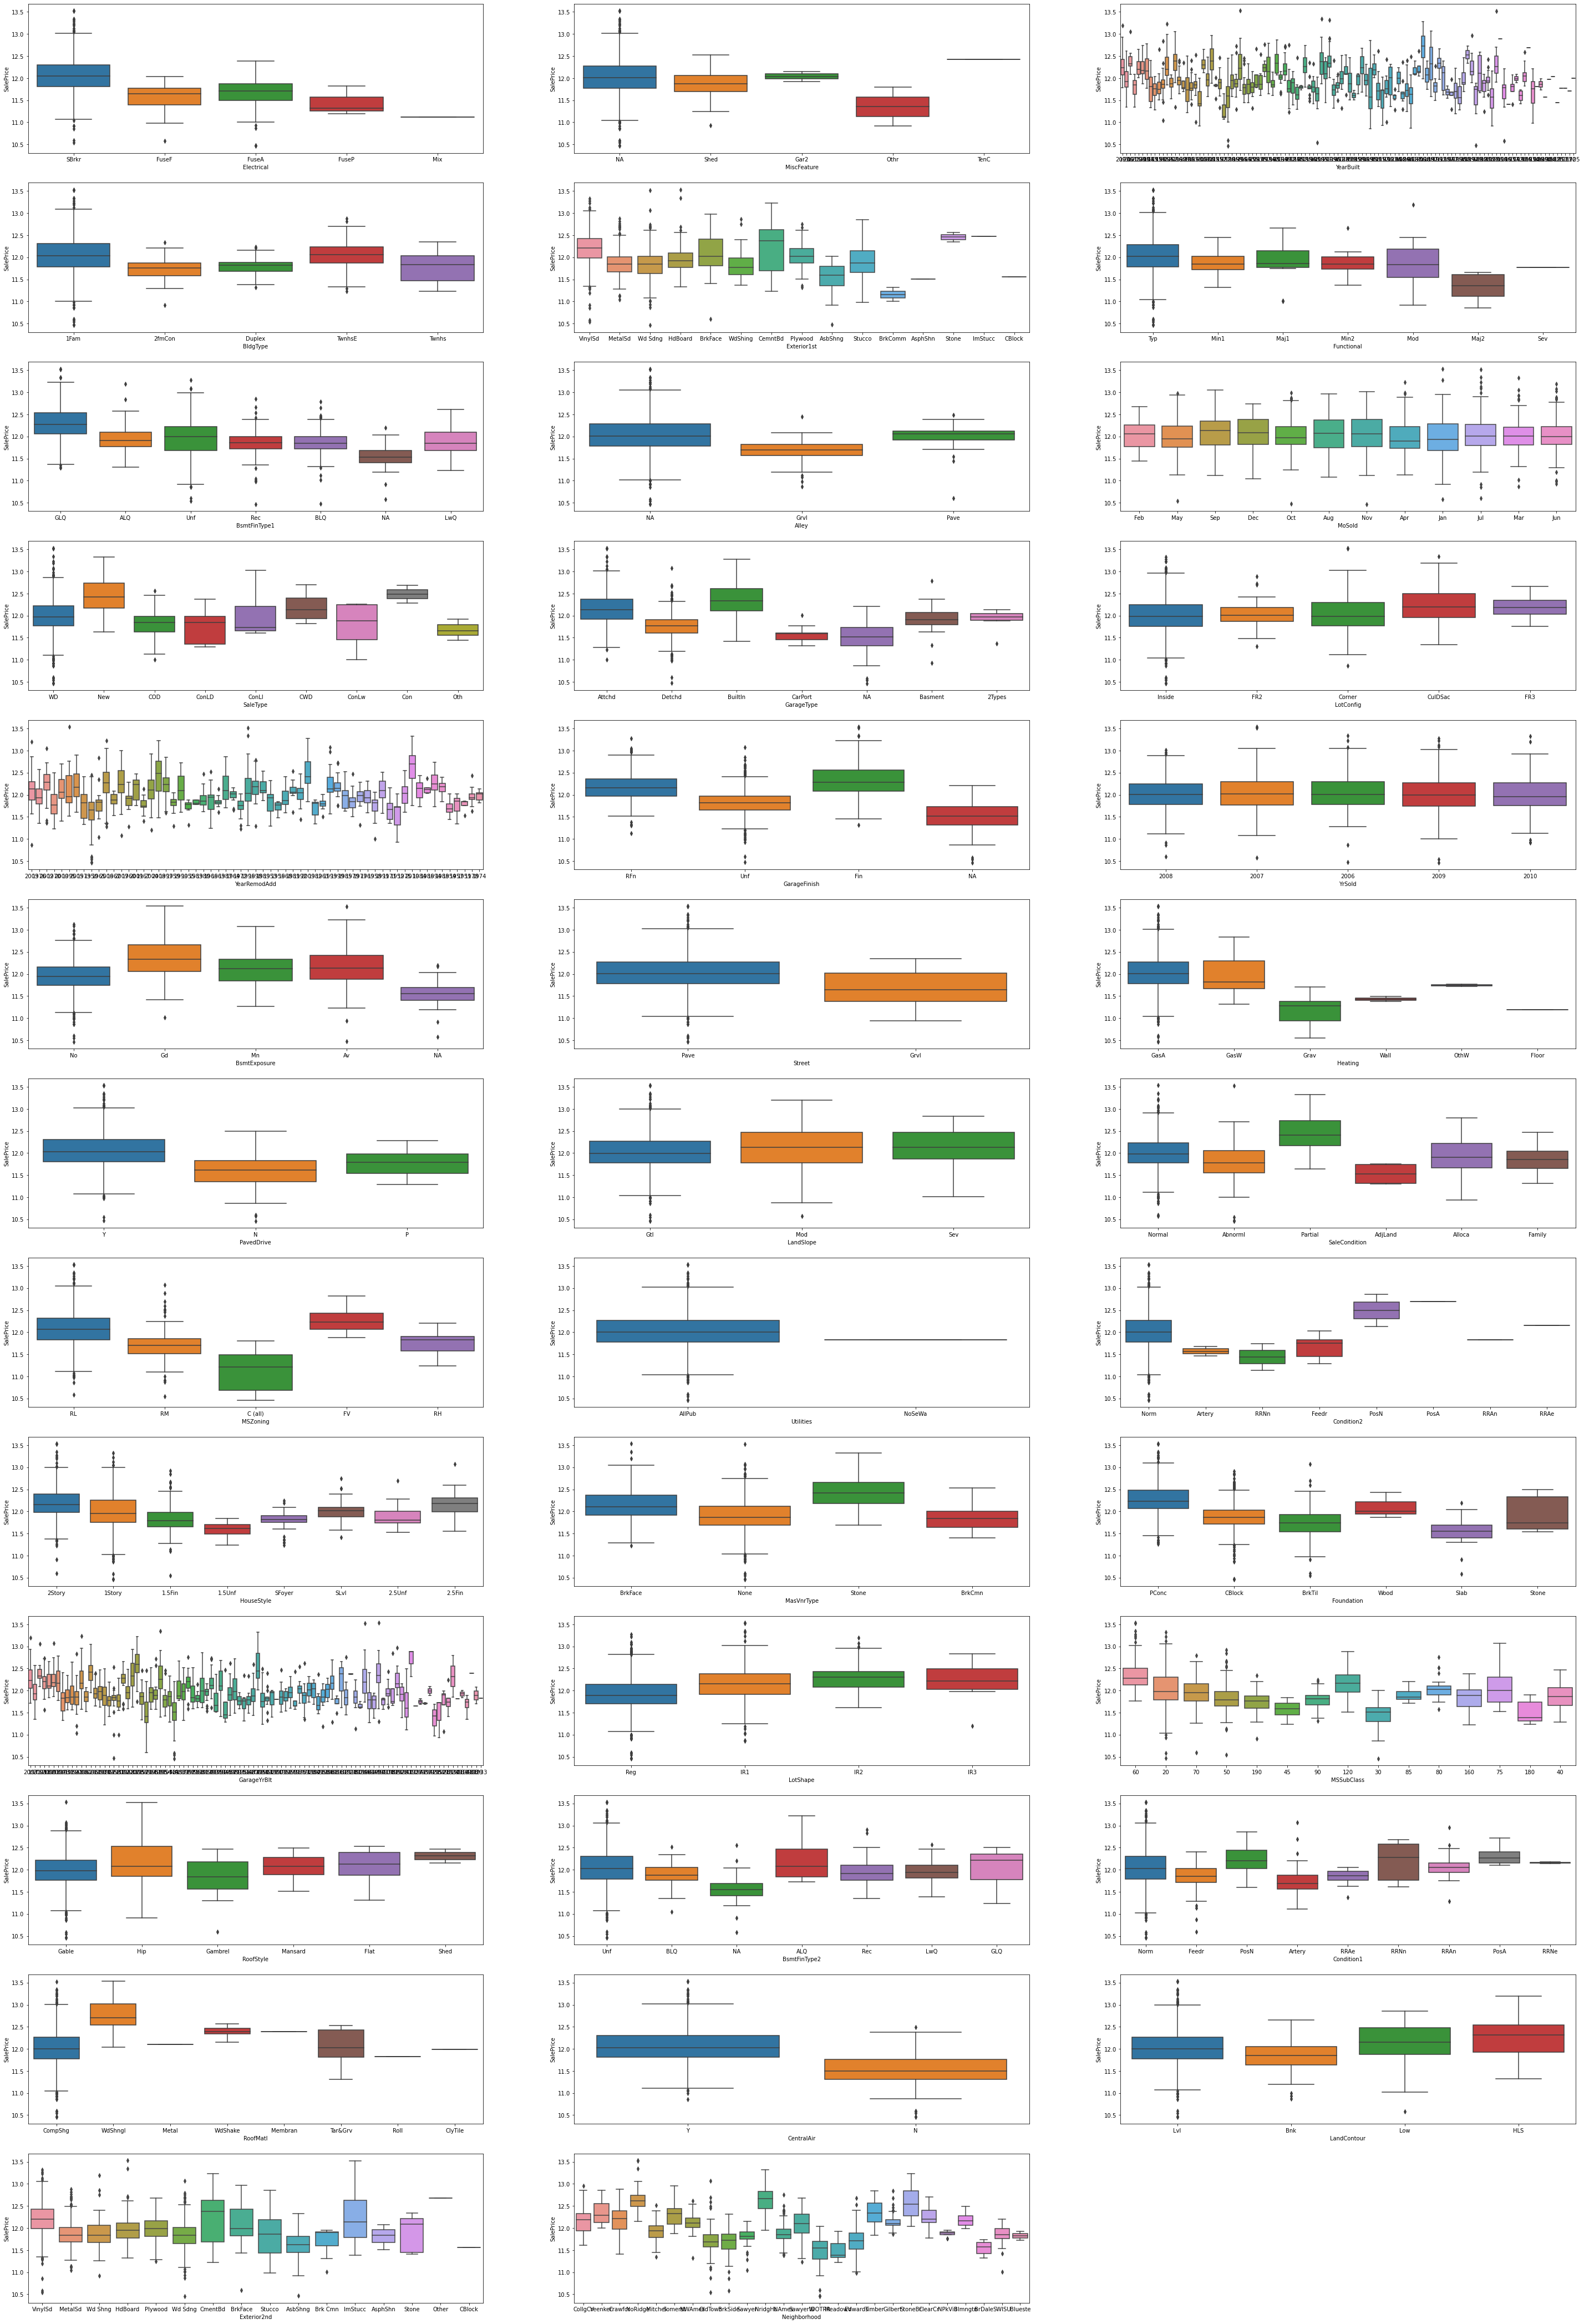

In [31]:
# Boxplots for all catagorical variables with respect to "SalesPrice"

finalCategoricalVar = list(set(categoricalVar).difference(set(rankingVar)))
plt.figure(figsize=(50, 100))
for i in range(len(finalCategoricalVar)):
    plt.subplot(17,3,i+1)
    sns.boxplot(x=finalCategoricalVar[i], y="SalePrice",data=df)
plt.show()

<AxesSubplot:>

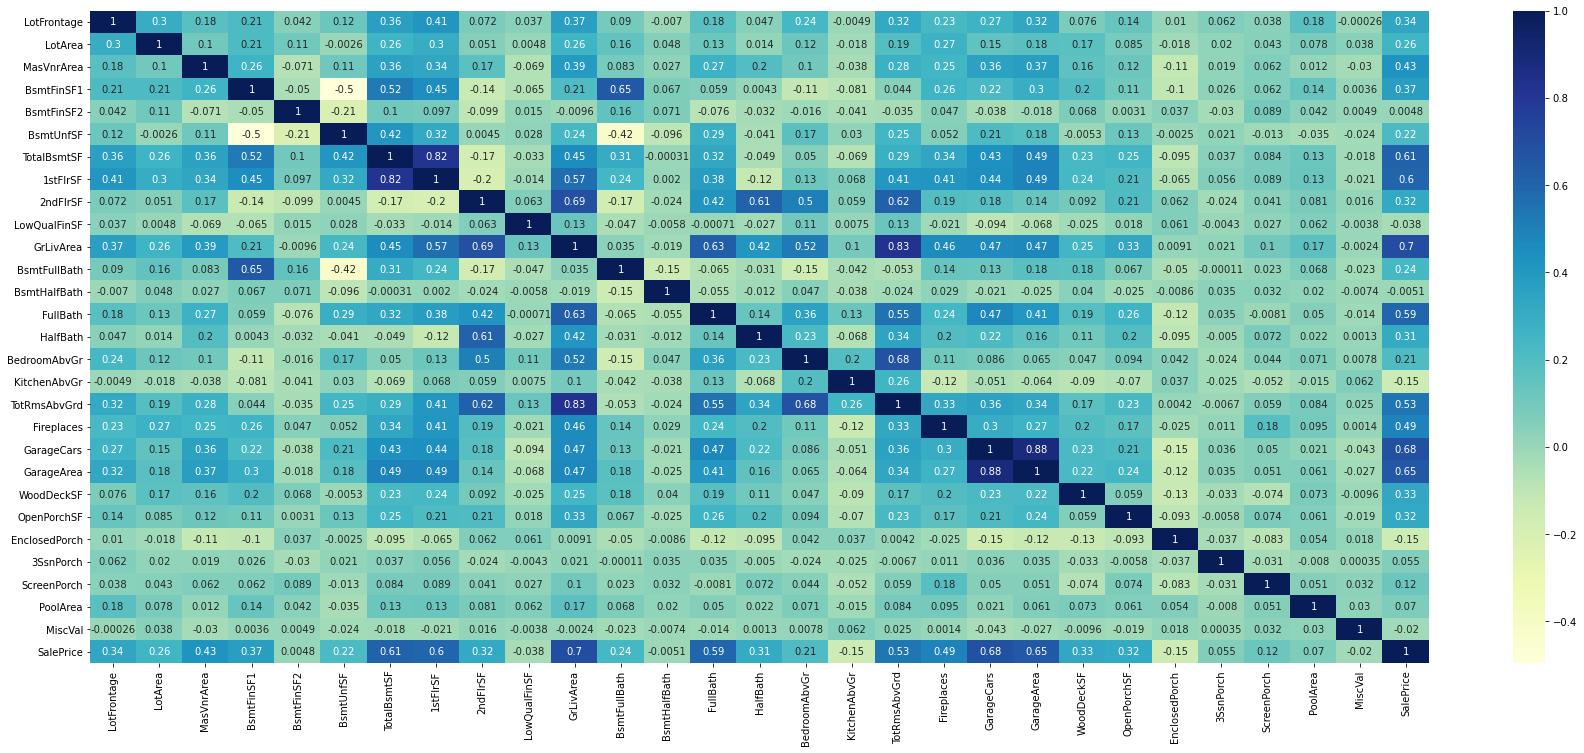

In [32]:
# heat map to understand the correlation between features.

plt.figure(figsize=(30, 12))
sns.heatmap(data=df[continiousVar].corr(), annot=True, cmap="YlGnBu")

## Step 3: preparing data for modeling

### creating dummy variables for all categorical variables.

In [33]:
data = pd.concat([pd.get_dummies(data=df[categoricalVar], drop_first=True), df[continiousVar]], axis=1)

In [34]:
data.info(max_cols=600)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 566 columns):
 #    Column                 Non-Null Count  Dtype  
---   ------                 --------------  -----  
 0    MSSubClass_160         1460 non-null   uint8  
 1    MSSubClass_180         1460 non-null   uint8  
 2    MSSubClass_190         1460 non-null   uint8  
 3    MSSubClass_20          1460 non-null   uint8  
 4    MSSubClass_30          1460 non-null   uint8  
 5    MSSubClass_40          1460 non-null   uint8  
 6    MSSubClass_45          1460 non-null   uint8  
 7    MSSubClass_50          1460 non-null   uint8  
 8    MSSubClass_60          1460 non-null   uint8  
 9    MSSubClass_70          1460 non-null   uint8  
 10   MSSubClass_75          1460 non-null   uint8  
 11   MSSubClass_80          1460 non-null   uint8  
 12   MSSubClass_85          1460 non-null   uint8  
 13   MSSubClass_90          1460 non-null   uint8  
 14   MSZoning_FV            1460 non-null  

### Train Test Split

In [35]:
data_train, data_test = train_test_split(data, train_size=0.7, random_state=100)

### Rescalling all continous variables using MinMaxScaler()

In [36]:
scaler = MinMaxScaler()
data_train[continiousVar] = scaler.fit_transform(data_train[continiousVar])
data_train.describe()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.045054,0.005877,0.024486,0.358472,0.041136,0.002938,0.010774,0.100881,0.196866,0.041136,...,0.442948,0.332860,0.108100,0.089934,0.042105,0.007756,0.037559,0.003318,0.003143,0.508400
std,0.207524,0.076471,0.154627,0.479787,0.198702,0.054153,0.103287,0.301319,0.397825,0.198702,...,0.186530,0.149657,0.145250,0.126569,0.114434,0.063649,0.136582,0.053278,0.037314,0.129011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,0.232722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.426511
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.338505,0.000000,0.049713,0.000000,0.000000,0.000000,0.000000,0.000000,0.497333
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.406206,0.196033,0.133843,0.000000,0.000000,0.000000,0.000000,0.000000,0.591417
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 4: Making model using Multiple Linear Regression.

### Spliting Training to x_train and y_train

In [37]:
y_train = data_train.pop("SalePrice")
x_train = data_train

### Fitting line using x_train and y_train

In [38]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(x_train, y_train)

LinearRegression()

In [39]:
print("Y Intercept " + str(lm.intercept_))
print("Coefficents ")
print(lm.coef_)

Y Intercept 165915029453.0831
Coefficents 
[-3.62019927e-02 -1.93951614e-02  9.83174258e+11  1.20255025e-02
 -1.29457996e-02  5.71194017e-02 -8.51067366e-02  2.46825654e-02
  5.61923396e-03  8.04138184e-03 -1.19369507e-01 -7.64369965e-03
  1.62396431e-02  3.19360144e+12  2.28958130e-01  2.30415344e-01
  2.33947754e-01  2.02224731e-01 -9.70840454e-04 -1.12762451e-02
 -3.08990479e-03  3.80134583e-03 -5.23567200e-04  3.36837769e-03
  4.07791138e-03  3.10897827e-03  3.18145752e-03 -4.10079956e-02
  1.84154510e-02 -5.76782227e-03  1.39713287e-04  1.28555298e-03
  2.51865387e-03 -8.36544037e-02  2.79235840e-02  2.53601074e-02
  4.05349731e-02  4.38232422e-02  1.11217499e-02  5.03158569e-02
  1.12533569e-03  9.18579102e-03  5.60760498e-02 -2.55107880e-02
 -2.48336792e-03  8.78906250e-03 -9.33074951e-03  9.09805298e-03
  2.14424133e-02  2.00805664e-02  2.20336914e-02  2.80761719e-03
  4.57763672e-03  1.73187256e-02  2.62298584e-02  2.23150253e-02
  1.01442337e-02  2.85167694e-02  2.10647583e-0

### Trasforming scaler to test data

In [40]:
data_test[continiousVar] = scaler.transform(data_test[continiousVar])
data_test.describe()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.038724,0.009112,0.011390,0.387244,0.061503,0.002278,0.002278,0.093394,0.223235,0.041002,...,0.439066,0.335170,0.114320,0.087549,0.034346,0.004282,0.046575,0.006444,0.002022,0.509342
std,0.193157,0.095127,0.106233,0.487676,0.240526,0.047727,0.047727,0.291316,0.416889,0.198522,...,0.187707,0.153518,0.148636,0.127082,0.101487,0.040640,0.174747,0.078665,0.013016,0.132208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026824
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,0.236953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.432731
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.331453,0.000000,0.045889,0.000000,0.000000,0.000000,0.000000,0.000000,0.505316
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.500000,0.406206,0.210035,0.125239,0.000000,0.000000,0.000000,0.000000,0.000000,0.588491
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.750000,0.880113,0.849475,1.045889,0.576087,0.482283,1.283422,1.138889,0.161290,0.931513


### Spliting Training to x_test and y_test

In [41]:
y_test = data_test.pop("SalePrice")
x_test = data_test

#### Creating function to display R2 (R-Squared) RSS (Residual Sum of Squared) and MSE (Mean Squared Error)

In [42]:
def displayR2_RSS_MSE(y_pred_train, y_pred_test):
    metric = []
    
    r2_train_lr = r2_score(y_train, y_pred_train)
    print("R2_Train : " + str(r2_train_lr))
    metric.append(r2_train_lr)
    
    r2_test_lr = r2_score(y_test, y_pred_test)
    print("R2_Test : " + str(r2_test_lr))
    metric.append(r2_test_lr)
    
    print(" ")
    
    rss_train_lr = np.sum(np.square(y_train - y_pred_train))
    print("RSS_Train : " + str(rss_train_lr))
    metric.append(rss_train_lr)
    
    rss_test_lr = np.sum(np.square(y_test - y_pred_test))
    print("RSS_Test : " + str(rss_test_lr))
    metric.append(rss_test_lr)
    
    print(" ")
    
    mse_train_lr = mean_squared_error(y_train, y_pred_train)
    print("MSE_Train : " + str(mse_train_lr))
    metric.append(mse_train_lr)
    
    mse_test_lr = mean_squared_error(y_test, y_pred_test)
    print("MSE_Test : " + str(mse_test_lr))
    metric.append(mse_test_lr)
    
    return metric

### Prediction Using Multiple Linear Regression

In [43]:
y_pred_train = lm.predict(x_train)
y_pred_test = lm.predict(x_test)

metric_lr = displayR2_RSS_MSE(y_pred_train, y_pred_test)

R2_Train : 0.9744735459759563
R2_Test : -1.889970530977041e+23
 
RSS_Train : 0.43335326456816453
RSS_Test : 1.4469140176328406e+24
 
MSE_Train : 0.0004244400240628448
MSE_Test : 3.295931703036083e+21


#### Note : As we can see model is clearly overfitted, To solve this problem we will use now regularisation techniques called Ridge and Lasso Regression One By One.

## Step 5: Making Model Using Ridge Regression

#### Folds for cross validation and List of Aplha Values

In [44]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

folds = 5

### Getting Best alpha using GridSearchCV for Ridge

In [45]:
ridge = Ridge()

model_r_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_r_cv.fit(x_train, y_train)
model_r_cv.best_params_["alpha"]

Fitting 5 folds for each of 28 candidates, totalling 140 fits


8.0

### Making Model Using Ridge Regression

In [46]:
ridge = Ridge(alpha = 8.0)

ridge.fit(x_train, y_train)

y_pred_r_train = ridge.predict(x_train)
y_pred_r_test = ridge.predict(x_test)

metric_ri = displayR2_RSS_MSE(y_pred_r_train, y_pred_r_test)

R2_Train : 0.9312879006573223
R2_Test : 0.8747429984254674
 
RSS_Train : 1.166500154601748
RSS_Test : 0.958936176063856
 
MSE_Train : 0.0011425074971613595
MSE_Test : 0.0021843648657491025


#### Note : As we can there no huge difference between train and test so we can say that ridge regression solves the problem of overfitting.

## Step 6: Making Model Using Lasso Regression

### Getting Best alpha using GridSearchCV for lasso

In [47]:
lasso = Lasso()

# cross validation
model_l_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_l_cv.fit(x_train, y_train)
model_l_cv.best_params_["alpha"]

Fitting 5 folds for each of 28 candidates, totalling 140 fits


0.0001

### Making Model Using Lasso Regression

In [48]:
lasso = Lasso(alpha=0.0001)
        
lasso.fit(x_train, y_train)

y_pred_l_train = lasso.predict(x_train)
y_pred_l_test = lasso.predict(x_test)

metric_la = displayR2_RSS_MSE(y_pred_l_train,y_pred_l_test)

R2_Train : 0.9502850256213753
R2_Test : 0.7753203246837418
 
RSS_Train : 0.8439929190559308
RSS_Test : 1.720091220280717
 
MSE_Train : 0.0008266336131791683
MSE_Test : 0.003918203235263593


#### Note : As we can see there is a addressable difference between train and test so we can say that lasso regression not solving the problem of overfitting.

#### Manual tunning in alpha to get best result.

In [49]:
for i in [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]:
    lasso = Lasso(alpha=i)

    lasso.fit(x_train, y_train)

    y_pred_l_train = lasso.predict(x_train)
    y_pred_l_test = lasso.predict(x_test)
    
    print("Alpha = " + str(i))
    print(" ")
    metric_la = displayR2_RSS_MSE(y_pred_l_train,y_pred_l_test)
    print(" ")

Alpha = 0.0001
 
R2_Train : 0.9502850256213753
R2_Test : 0.7753203246837418
 
RSS_Train : 0.8439929190559308
RSS_Test : 1.720091220280717
 
MSE_Train : 0.0008266336131791683
MSE_Test : 0.003918203235263593
 
Alpha = 0.0002
 
R2_Train : 0.9309156645230358
R2_Test : 0.8419979035473498
 
RSS_Train : 1.172819471175502
RSS_Test : 1.2096244064426254
 
MSE_Train : 0.001148696837586192
MSE_Test : 0.002755408670712131
 
Alpha = 0.0003
 
R2_Train : 0.9119590282751849
R2_Test : 0.8689144003621165
 
RSS_Train : 1.4946393446095327
RSS_Test : 1.003558460394661
 
MSE_Train : 0.0014638974971689842
MSE_Test : 0.002286010160352303
 
Alpha = 0.0004
 
R2_Train : 0.8993421710545795
R2_Test : 0.869239004979881
 
RSS_Train : 1.7088311105316556
RSS_Test : 1.00107336888697
 
MSE_Train : 0.0016736837517450105
MSE_Test : 0.002280349359651412
 
Alpha = 0.0005
 
R2_Train : 0.8918800901457336
R2_Test : 0.8618703625034128
 
RSS_Train : 1.8355121262056022
RSS_Test : 1.0574858468350523
 
MSE_Train : 0.0017977591833551

#### As we can see after alpha = "0.0004" test accuracy is not increasing but train is contious decreaing.

### Lasso Model using alpha = 0.0004

In [50]:
lasso = Lasso(alpha=0.0004)

lasso.fit(x_train, y_train)

y_pred_l_train = lasso.predict(x_train)
y_pred_l_test = lasso.predict(x_test)

metric_la = displayR2_RSS_MSE(y_pred_l_train,y_pred_l_test)

R2_Train : 0.8993421710545795
R2_Test : 0.869239004979881
 
RSS_Train : 1.7088311105316556
RSS_Test : 1.00107336888697
 
MSE_Train : 0.0016736837517450105
MSE_Test : 0.002280349359651412


### Creating a table which contain all the metrics

In [51]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric_ri, name = 'Ridge Regression')
ls_metric = pd.Series(metric_la, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.744735e-01,0.931288,0.899342
1,R2 Score (Test),-1.889971e+23,0.874743,0.869239
2,RSS (Train),4.333533e-01,1.166500,1.708831
3,RSS (Test),1.446914e+24,0.958936,1.001073
4,MSE (Train),4.244400e-04,0.001143,0.001674
5,MSE (Test),3.295932e+21,0.002184,0.002280


### Lets observe the changes in the coefficients after regularization

In [52]:
betas = pd.DataFrame(index=data_train.columns)
betas.rows = data_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [53]:
pd.set_option('display.max_rows', None)
betas.head(10)

,Linear,Ridge,Lasso
MSSubClass_160,-3.620199e-02,-0.019002,-0.013686
MSSubClass_180,-1.939516e-02,-0.013224,-0.000000
MSSubClass_190,9.831743e+11,-0.004017,-0.000000
MSSubClass_20,1.202550e-02,0.016216,0.018721
MSSubClass_30,-1.294580e-02,-0.023357,-0.027165
MSSubClass_40,5.711940e-02,-0.002319,-0.000000
MSSubClass_45,-8.510674e-02,-0.002166,0.000000
MSSubClass_50,2.468257e-02,0.007309,0.000000
MSSubClass_60,5.619234e-03,-0.002533,0.000000
MSSubClass_70,8.041382e-03,0.018656,0.001171


In [54]:
featuresUsedByLasso = list(betas[betas["Lasso"] != 0.0].index)
len(featuresUsedByLasso)

92

In [55]:
featuresUsedByRidge = list(betas[betas["Ridge"] != 0.0].index)
len(featuresUsedByRidge)

554

In [56]:
betas["Lasso"].sort_values()[:5]

OverallCond_FA         -0.040238
MSSubClass_30          -0.027165
BsmtExposure_NA        -0.022992
FireplaceQu_NA         -0.021503
Neighborhood_Edwards   -0.020686
Name: Lasso, dtype: float64

In [57]:
betas["Lasso"].sort_values()[-5:]

OverallQual_VG    0.046114
FullBath          0.047523
GarageCars        0.076874
OverallQual_EX    0.078985
GrLivArea         0.333503
Name: Lasso, dtype: float64

In [58]:
betas["Ridge"].sort_values()[:5]

OverallCond_FA        -0.036466
PoolQC_Gd             -0.036085
OverallQual_PO        -0.028463
Condition2_PosN       -0.025237
Neighborhood_IDOTRR   -0.025118
Name: Ridge, dtype: float64

In [59]:
betas["Ridge"].sort_values()[-5:]

OverallQual_EX    0.050055
1stFlrSF          0.050831
TotRmsAbvGrd      0.051563
FullBath          0.053603
GrLivArea         0.060672
Name: Ridge, dtype: float64

## Question 1

### 1. What is the optimal value of alpha for ridge and lasso regression?

    Optimal value of alpha for Ridge Regression : "8.0"
    Optimal value of alpha for Lasso Regression : "0.0004"

### 2. What will be the changes in the model if you choose double the value of alpha for both ridge and lasso?

In [60]:
ridge2x = Ridge(alpha=16)

ridge2x.fit(x_train, y_train)

y_pred_r_train = ridge2x.predict(x_train)
y_pred_r_test = ridge2x.predict(x_test)

metric_ri_2x = displayR2_RSS_MSE(y_pred_r_train, y_pred_r_test)

R2_Train : 0.9175274236701499
R2_Test : 0.8676889833657089
 
RSS_Train : 1.400106734614369
RSS_Test : 1.012939945452162
 
MSE_Train : 0.0013713092405625554
MSE_Test : 0.0023073802857680225


In [61]:
lasso2x = Lasso(alpha=0.0008)

lasso2x.fit(x_train, y_train)

y_pred_l_train = lasso2x.predict(x_train)
y_pred_l_test = lasso2x.predict(x_test)

metric_la_2x = displayR2_RSS_MSE(y_pred_l_train,y_pred_l_test)

R2_Train : 0.8726215191297846
R2_Test : 0.8409485262973453
 
RSS_Train : 2.1624578356573863
RSS_Test : 1.217658175371454
 
MSE_Train : 0.0021179802503990073
MSE_Test : 0.0027737088277254075


In [62]:
final_metric = pd.concat([final_metric, pd.Series(metric_ri_2x, name = 'Ridge 2x'), pd.Series(metric_la_2x, name = 'Lasso 2x')], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge 2x,Lasso 2x
0,R2 Score (Train),9.744735e-01,0.931288,0.899342,0.917527,0.872622
1,R2 Score (Test),-1.889971e+23,0.874743,0.869239,0.867689,0.840949
2,RSS (Train),4.333533e-01,1.166500,1.708831,1.400107,2.162458
3,RSS (Test),1.446914e+24,0.958936,1.001073,1.012940,1.217658
4,MSE (Train),4.244400e-04,0.001143,0.001674,0.001371,0.002118
5,MSE (Test),3.295932e+21,0.002184,0.002280,0.002307,0.002774


    We observe that overall acuracy of a model in both Ridge and lasso regression decrease slighly.

### 3. What will be the most important predictor variables after the change is implemented?

In [63]:
betas['Ridge2x'] = ridge2x.coef_
betas['Lasso2x'] = lasso2x.coef_

In [64]:
betas["Ridge2x"].sort_values()[-1:]

GrLivArea    0.047598
Name: Ridge2x, dtype: float64

In [65]:
betas["Ridge2x"].sort_values()[:1]

OverallCond_FA   -0.02702
Name: Ridge2x, dtype: float64

In [66]:
betas["Lasso2x"].sort_values()[-1:]

GrLivArea    0.30607
Name: Lasso2x, dtype: float64

In [67]:
betas["Lasso2x"].sort_values()[:1]

FireplaceQu_NA   -0.027481
Name: Lasso2x, dtype: float64

In [68]:
# Note :  Who ever is far from zero that will be the most important variable

    The most important predictor variable after the change is implemented is "GrLivArea".

## Question 2

### You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

In [69]:
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Ridge 2x,Lasso 2x
0,R2 Score (Train),9.744735e-01,0.931288,0.899342,0.917527,0.872622
1,R2 Score (Test),-1.889971e+23,0.874743,0.869239,0.867689,0.840949
2,RSS (Train),4.333533e-01,1.166500,1.708831,1.400107,2.162458
3,RSS (Test),1.446914e+24,0.958936,1.001073,1.012940,1.217658
4,MSE (Train),4.244400e-04,0.001143,0.001674,0.001371,0.002118
5,MSE (Test),3.295932e+21,0.002184,0.002280,0.002307,0.002774


If take the closer look at the matrix table Ridge has slighly more accurate in both (Train and Test data), But lasso has feature elimination feature by doing coefficient zero. Means Lasso is take very less features to predict the data means its a more simpler model than ridge. So i will go with lasso regression if there no specific requirement from business that specific features should be there in the model.

## Question 3

### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [70]:
betas["Lasso"].sort_values()[:5]

OverallCond_FA         -0.040238
MSSubClass_30          -0.027165
BsmtExposure_NA        -0.022992
FireplaceQu_NA         -0.021503
Neighborhood_Edwards   -0.020686
Name: Lasso, dtype: float64

In [71]:
betas["Lasso"].sort_values()[-5:]

OverallQual_VG    0.046114
FullBath          0.047523
GarageCars        0.076874
OverallQual_EX    0.078985
GrLivArea         0.333503
Name: Lasso, dtype: float64

In [72]:
currentTop5var = ["GrLivArea","OverallQual_VG","OverallQual_EX","GarageCars","FullBath"]

In [73]:
updatedCols = list(set(list(x_train.columns)).difference(set(currentTop5var)))
len(updatedCols)

560

In [74]:
lassoQ3 = Lasso(alpha=0.0004)

lassoQ3.fit(x_train[updatedCols], y_train)

y_pred_l_train = lassoQ3.predict(x_train[updatedCols])
y_pred_l_test = lassoQ3.predict(x_test[updatedCols])

metric_la_Q3 = displayR2_RSS_MSE(y_pred_l_train,y_pred_l_test)

R2_Train : 0.8916128912830926
R2_Test : 0.8556692150379317
 
RSS_Train : 1.8400482634734447
RSS_Test : 1.1049602759129198
 
MSE_Train : 0.0018022020210317774
MSE_Test : 0.00251699379479025


In [75]:
Q3 = pd.Series(lassoQ3.coef_,index=updatedCols)

In [76]:
Q3.sort_values()[:5]

PoolQC_Gd              -0.059595
OverallCond_FA         -0.040961
MSSubClass_30          -0.028432
Neighborhood_Edwards   -0.027849
KitchenQual_TA         -0.026977
dtype: float64

In [77]:
Q3.sort_values()[-5:]

Neighborhood_NridgHt    0.043402
TotRmsAbvGrd            0.068355
GarageArea              0.084342
2ndFlrSF                0.130429
1stFlrSF                0.271785
dtype: float64

    According to above data after removing earier top 5 variables the current 5 most important variables are:
    1. "1stFlrSF"
    2. "2ndFlrSF"
    3. "GarageArea"
    4. "TotRmsAbvGrd"
    5. "PoolQC_Gd"

## Question 4

### 1. How can you make sure that a model is robust and generalisable?

Robust can be achieve by decreasing bias and generalisation can be achieved by decreasing variance. Since bias and variance are inversely proportionate to each other we can achieve robustness and generalisation By balancing them, and we can do that by regularisation.

### 2. What are the implications of the same for the accuracy of the model and why?

Implications are as follows : When there is a high varience and Low bias, model get overfitted and in overfited model we get high accuracy on training data (Seen Data) but very low accuracy on test data (Unseen Data) means there is huge difference between of train and test accturacy which result to failular of a model.

In [78]:
# featureNo  = int(round(x_train.shape[1] * 1, 0))
# rfe = RFE(lm, featureNo) 
# rfe = rfe.fit(x_train,y_train)
# col = x_train.columns[rfe.support_]
# col = list(col)
# col